<a href="https://colab.research.google.com/github/huyhoang17/Colab_Temporary/blob/master/[Test]Poincare_Embedding_Mammal_Gensim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- https://nbviewer.jupyter.org/github/RaRe-Technologies/gensim/blob/develop/docs/notebooks/Poincare%20Tutorial.ipynb

- https://nbviewer.jupyter.org/github/harmanpreet93/poincare-embedding-using-gensim/blob/master/poincare-embeddings-using-gensim.ipynb

In [0]:
%load_ext autoreload
%autoreload 2

In [0]:
# !wget https://raw.githubusercontent.com/jayantj/gensim/poincare_data/docs/notebooks/poincare/data/wordnet_mammal_hypernyms.tsv

In [0]:
ls

Poincare_Embedding_Mammal.ipynb  wordnet_mammal_hypernyms.tsv


In [0]:
import gensim

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [0]:
import os
import logging
import numpy as np

from gensim.models.poincare import PoincareModel, PoincareKeyedVectors, PoincareRelations

logging.basicConfig(level=logging.INFO)

In [0]:
data_directory = os.path.join(os.getcwd(), 'data')
wordnet_mammal_file = os.path.join(data_directory, 'wordnet_mammal_hypernyms.tsv')

In [0]:
os.path.exists(wordnet_mammal_file)

True

In [0]:
model = PoincareModel(train_data=[('node.1', 'node.2'), ('node.2', 'node.3')])

INFO:gensim.models.poincare:loading relations from train data..
INFO:gensim.models.poincare:loaded 2 relations from train data, 3 nodes


In [0]:
!head $wordnet_mammal_file

kangaroo.n.01	marsupial.n.01
domestic_goat.n.01	even-toed_ungulate.n.01
rock_squirrel.n.01	ground_squirrel.n.02
vizsla.n.01	dog.n.01
dandie_dinmont.n.01	mammal.n.01
broodmare.n.01	horse.n.01
spotted_skunk.n.01	spotted_skunk.n.01
hispid_pocket_mouse.n.01	hispid_pocket_mouse.n.01
lesser_kudu.n.01	placental.n.01
water_shrew.n.01	insectivore.n.01


In [0]:
!tail $wordnet_mammal_file

cactus_mouse.n.01	mouse.n.01
hart.n.03	ruminant.n.01
broodmare.n.01	equine.n.01
sussex_spaniel.n.01	sporting_dog.n.01
omaha.n.04	odd-toed_ungulate.n.01
alaska_fur_seal.n.01	placental.n.01
cattalo.n.01	bovine.n.01
soft-coated_wheaten_terrier.n.01	mammal.n.01
harness_horse.n.01	horse.n.01
banteng.n.01	even-toed_ungulate.n.01


In [0]:
relations = PoincareRelations(file_path=wordnet_mammal_file, delimiter='\t')

In [0]:
model = PoincareModel(train_data=relations)

INFO:gensim.models.poincare:loading relations from train data..
INFO:gensim.models.poincare:loaded 7724 relations from train data, 1182 nodes


In [0]:
model = PoincareModel(train_data=relations, size=2, burn_in=0)

INFO:gensim.models.poincare:loading relations from train data..
INFO:gensim.models.poincare:loaded 7724 relations from train data, 1182 nodes


In [0]:
model.train(epochs=10, print_every=500)

INFO:gensim.models.poincare:training model of size 2 with 1 workers on 7724 relations for 10 epochs and 0 burn-in epochs, using lr=0.10000 burn-in lr=0.01000 negative=10
INFO:gensim.models.poincare:starting training (10 epochs)----------------------------------------
INFO:gensim.models.poincare:training on epoch 1, examples #4990-#5000, loss: 23.57
INFO:gensim.models.poincare:time taken for 5000 examples: 0.46 s, 10815.48 examples / s
INFO:gensim.models.poincare:training on epoch 2, examples #4990-#5000, loss: 22.37
INFO:gensim.models.poincare:time taken for 5000 examples: 0.44 s, 11273.64 examples / s
INFO:gensim.models.poincare:training on epoch 3, examples #4990-#5000, loss: 21.18
INFO:gensim.models.poincare:time taken for 5000 examples: 0.45 s, 11080.12 examples / s
INFO:gensim.models.poincare:training on epoch 4, examples #4990-#5000, loss: 20.08
INFO:gensim.models.poincare:time taken for 5000 examples: 0.45 s, 11108.83 examples / s
INFO:gensim.models.poincare:training on epoch 5,

In [0]:
model.save(os.path.join('models', 'test_model'))

INFO:gensim.utils:saving PoincareModel object under models/test_model, separately None
INFO:gensim.utils:not storing attribute _node_probabilities
INFO:gensim.utils:not storing attribute _node_counts_cumsum
INFO:gensim.utils:saved models/test_model


In [0]:
model2 = PoincareModel.load(os.path.join('models','test_model'))

INFO:gensim.utils:loading PoincareModel object from models/test_model
INFO:gensim.utils:loading kv recursively from models/test_model.kv.* with mmap=None
INFO:gensim.utils:setting ignored attribute _node_probabilities to None
INFO:gensim.utils:setting ignored attribute _node_counts_cumsum to None
INFO:gensim.utils:loaded models/test_model


In [0]:
model.kv.save_word2vec_format(os.path.join('models','test_vectors'))

INFO:gensim.models.utils_any2vec:storing 1182x2 projection weights into models/test_vectors


In [0]:
vectors = PoincareKeyedVectors.load_word2vec_format(os.path.join('models','test_vectors'))

INFO:gensim.models.utils_any2vec:loading projection weights from models/test_vectors
INFO:gensim.models.utils_any2vec:loaded (1182, 2) matrix from models/test_vectors


### Train Poincare Model on WordNet data

In [0]:
relations = PoincareRelations(file_path=wordnet_mammal_file, delimiter='\t')
size = 50
burn_in = 0
workers = 1 # multi-threaded version wasn't implemented yet
negative = 15
epochs = 100
print_every = 500
batch_size = 10
model = PoincareModel(train_data=relations, size=size, burn_in=burn_in, workers=workers, negative=negative)
model.train(epochs=epochs, print_every=print_every,batch_size=batch_size)

INFO:gensim.models.poincare:loading relations from train data..
INFO:gensim.models.poincare:loaded 7724 relations from train data, 1182 nodes
INFO:gensim.models.poincare:training model of size 50 with 1 workers on 7724 relations for 100 epochs and 0 burn-in epochs, using lr=0.10000 burn-in lr=0.01000 negative=15
INFO:gensim.models.poincare:starting training (100 epochs)----------------------------------------
INFO:gensim.models.poincare:training on epoch 1, examples #4990-#5000, loss: 27.14
INFO:gensim.models.poincare:time taken for 5000 examples: 1.04 s, 4808.99 examples / s
INFO:gensim.models.poincare:training on epoch 2, examples #4990-#5000, loss: 24.86
INFO:gensim.models.poincare:time taken for 5000 examples: 1.02 s, 4900.23 examples / s
INFO:gensim.models.poincare:training on epoch 3, examples #4990-#5000, loss: 22.18
INFO:gensim.models.poincare:time taken for 5000 examples: 1.05 s, 4773.69 examples / s
INFO:gensim.models.poincare:training on epoch 4, examples #4990-#5000, loss: 

INFO:gensim.models.poincare:training on epoch 47, examples #4990-#5000, loss: 5.71
INFO:gensim.models.poincare:time taken for 5000 examples: 1.02 s, 4888.87 examples / s
INFO:gensim.models.poincare:training on epoch 48, examples #4990-#5000, loss: 5.71
INFO:gensim.models.poincare:time taken for 5000 examples: 1.10 s, 4531.51 examples / s
INFO:gensim.models.poincare:training on epoch 49, examples #4990-#5000, loss: 5.65
INFO:gensim.models.poincare:time taken for 5000 examples: 1.05 s, 4743.28 examples / s
INFO:gensim.models.poincare:training on epoch 50, examples #4990-#5000, loss: 5.62
INFO:gensim.models.poincare:time taken for 5000 examples: 1.18 s, 4220.02 examples / s
INFO:gensim.models.poincare:training on epoch 51, examples #4990-#5000, loss: 5.67
INFO:gensim.models.poincare:time taken for 5000 examples: 1.20 s, 4178.98 examples / s
INFO:gensim.models.poincare:training on epoch 52, examples #4990-#5000, loss: 5.59
INFO:gensim.models.poincare:time taken for 5000 examples: 1.13 s, 4

INFO:gensim.models.poincare:time taken for 5000 examples: 1.11 s, 4507.79 examples / s
INFO:gensim.models.poincare:training on epoch 96, examples #4990-#5000, loss: 4.82
INFO:gensim.models.poincare:time taken for 5000 examples: 1.19 s, 4206.02 examples / s
INFO:gensim.models.poincare:training on epoch 97, examples #4990-#5000, loss: 4.88
INFO:gensim.models.poincare:time taken for 5000 examples: 1.21 s, 4141.96 examples / s
INFO:gensim.models.poincare:training on epoch 98, examples #4990-#5000, loss: 4.91
INFO:gensim.models.poincare:time taken for 5000 examples: 1.12 s, 4458.38 examples / s
INFO:gensim.models.poincare:training on epoch 99, examples #4990-#5000, loss: 4.84
INFO:gensim.models.poincare:time taken for 5000 examples: 1.06 s, 4706.94 examples / s
INFO:gensim.models.poincare:training on epoch 100, examples #4990-#5000, loss: 4.86
INFO:gensim.models.poincare:time taken for 5000 examples: 1.04 s, 4787.59 examples / s
INFO:gensim.models.poincare:training finished


### Save Poincare model

In [0]:
# Saves the entire PoincareModel instance, the loaded model can be trained further
model.save(os.path.join("models", 'gensim_model_batch_size_10_burn_in_0_epochs_100_neg_15_dim_50'))

# Saves only the vectors from the PoincareModel instance, in the commonly used word2vec format
model.kv.save_word2vec_format(os.path.join("models", 'gensim_model_batch_size_10_burn_in_0_epochs_100_neg_15_dim_50_vectors'))
PoincareKeyedVectors.load_word2vec_format(os.path.join("models", 'gensim_model_batch_size_10_burn_in_0_epochs_100_neg_15_dim_50_vectors'))

INFO:gensim.utils:saving PoincareModel object under models/gensim_model_batch_size_10_burn_in_0_epochs_100_neg_15_dim_50, separately None
INFO:gensim.utils:not storing attribute _node_probabilities
INFO:gensim.utils:not storing attribute _node_counts_cumsum
INFO:gensim.utils:saved models/gensim_model_batch_size_10_burn_in_0_epochs_100_neg_15_dim_50
INFO:gensim.models.utils_any2vec:storing 1182x50 projection weights into models/gensim_model_batch_size_10_burn_in_0_epochs_100_neg_15_dim_50_vectors
INFO:gensim.models.utils_any2vec:loading projection weights from models/gensim_model_batch_size_10_burn_in_0_epochs_100_neg_15_dim_50_vectors
INFO:gensim.models.utils_any2vec:loaded (1182, 50) matrix from models/gensim_model_batch_size_10_burn_in_0_epochs_100_neg_15_dim_50_vectors


In [0]:
!ls models

gensim_model_batch_size_10_burn_in_0_epochs_100_neg_15_dim_50
gensim_model_batch_size_10_burn_in_0_epochs_100_neg_15_dim_50_vectors
test_model
test_vectors


### Load Model

In [0]:
# Load an example model
test_model_path = os.path.join("models", 'gensim_model_batch_size_10_burn_in_0_epochs_100_neg_15_dim_50')
model = PoincareModel.load(test_model_path)

INFO:gensim.utils:loading PoincareModel object from models/gensim_model_batch_size_10_burn_in_0_epochs_100_neg_15_dim_50
INFO:gensim.utils:loading kv recursively from models/gensim_model_batch_size_10_burn_in_0_epochs_100_neg_15_dim_50.kv.* with mmap=None
INFO:gensim.utils:setting ignored attribute _node_probabilities to None
INFO:gensim.utils:setting ignored attribute _node_counts_cumsum to None
INFO:gensim.utils:loaded models/gensim_model_batch_size_10_burn_in_0_epochs_100_neg_15_dim_50


In [0]:
model.kv.distance('leopard.n.02', 'mammal.n.01')

4.6996343113350845

In [0]:
model.kv.distance('big_cat.n.01', 'carnivore.n.01')

4.05283757757651

In [0]:
model.kv.distance('leopard.n.02', 'carnivore.n.01')

5.899219325927009

In [0]:
model.kv.most_similar('carnivore.n.01')

[('canine.n.02', 1.4622685157321058),
 ('dog.n.01', 1.7998485698460545),
 ('mammal.n.01', 2.2189321543666836),
 ('placental.n.01', 2.253621796196318),
 ('hunting_dog.n.01', 2.5581271084899964),
 ('working_dog.n.01', 2.939891969715774),
 ('terrier.n.01', 3.1837159005993154),
 ('hound.n.01', 3.2627874434520683),
 ('sporting_dog.n.01', 3.430326973465194),
 ('ungulate.n.01', 3.713664161261775)]

In [0]:
model.kv.most_similar('placental.n.01')

[('mammal.n.01', 0.14645553384552298),
 ('ungulate.n.01', 1.540289528532619),
 ('rodent.n.01', 2.2167308771485357),
 ('carnivore.n.01', 2.253621796196318),
 ('canine.n.02', 2.2648718242311165),
 ('primate.n.02', 2.493889812208345),
 ('dog.n.01', 2.675541827178736),
 ('bovid.n.01', 2.8032366921995058),
 ('ruminant.n.01', 2.8583992985502293),
 ('horse.n.01', 2.8594645400993772)]

In [0]:
model.kv.most_similar('dog.n.01')

[('canine.n.02', 0.6940082439545993),
 ('carnivore.n.01', 1.799848569846055),
 ('hunting_dog.n.01', 2.102261594865515),
 ('mammal.n.01', 2.636876641390817),
 ('placental.n.01', 2.675541827178737),
 ('hound.n.01', 3.076053270695522),
 ('terrier.n.01', 3.1882716701053258),
 ('sporting_dog.n.01', 3.284713879653239),
 ('working_dog.n.01', 3.3184642024075632),
 ('spaniel.n.01', 3.7835057476631344)]

In [0]:
model.kv.most_similar('water_buffalo.n.01')

[('old_world_buffalo.n.01', 4.535602868678815),
 ('ungulate.n.01', 4.776634516635558),
 ('placental.n.01', 4.928882990831339),
 ('mammal.n.01', 4.950466575525492),
 ('bovid.n.01', 5.302031802179551),
 ('ruminant.n.01', 5.3361939826241604),
 ('even-toed_ungulate.n.01', 5.38102898984388),
 ('antelope.n.01', 6.234752116735898),
 ('bovine.n.01', 6.385315881570075),
 ('rodent.n.01', 6.487380883950741)]

In [0]:
model.kv.most_similar('rodent.n.01')

[('placental.n.01', 2.2167308771485357),
 ('mammal.n.01', 2.2495965615454594),
 ('ungulate.n.01', 3.2636266955897715),
 ('squirrel.n.01', 3.580557360231174),
 ('rat.n.01', 3.791180665616557),
 ('mouse.n.01', 3.8481892737284618),
 ('carnivore.n.01', 3.916215035173135),
 ('canine.n.02', 3.956813566470553),
 ('primate.n.02', 4.003461462425588),
 ('ground_squirrel.n.02', 4.14184857850737)]

In [0]:
model.kv.most_similar('rat.n.01')

[('pocket_rat.n.01', 1.9203139422218085),
 ('placental.n.01', 3.4274962065357326),
 ('mammal.n.01', 3.460372398746926),
 ('gopher.n.04', 3.658878861481397),
 ('rodent.n.01', 3.791180665616557),
 ('pocket_mouse.n.01', 3.9305179704671156),
 ('ungulate.n.01', 4.469113630749723),
 ('carnivore.n.01', 4.976579507134635),
 ('canine.n.02', 5.008050036363146),
 ('primate.n.02', 5.2113547616528955)]

In [0]:
model.kv.most_similar('ungulate.n.01')

[('placental.n.01', 1.540289528532619),
 ('mammal.n.01', 1.5764339459988883),
 ('bovid.n.01', 2.3998372043187866),
 ('even-toed_ungulate.n.01', 2.4237860114509253),
 ('ruminant.n.01', 2.4452965085767464),
 ('odd-toed_ungulate.n.01', 2.8792636724601106),
 ('horse.n.01', 2.9122289575872817),
 ('equine.n.01', 3.0234663015759593),
 ('bovine.n.01', 3.088924285509799),
 ('antelope.n.01', 3.2286959998520084)]

In [0]:
model.kv.most_similar('horse.n.01')

[('equine.n.01', 0.9909224063410882),
 ('odd-toed_ungulate.n.01', 1.0767240202495443),
 ('saddle_horse.n.01', 2.8004988083198548),
 ('racehorse.n.01', 2.8087947852250443),
 ('placental.n.01', 2.8594645400993772),
 ('mammal.n.01', 2.879713565770368),
 ('ungulate.n.01', 2.9122289575872817),
 ('thoroughbred.n.02', 3.3844598450070644),
 ('workhorse.n.02', 3.8375313266289632),
 ('draft_horse.n.01', 4.159634832726027)]

In [0]:
# Rank of distance of node 2 from node 1 in relation to distances of all nodes from node 1
model.kv.rank('dog.n.01', 'carnivore.n.01')

2

In [0]:
model.kv.rank('big_cat.n.01', 'carnivore.n.01')

5

In [0]:
model.kv.rank('horse.n.01', 'mammal.n.01')

6

In [0]:
# Finding Poincare distance between input vectors
vector_1 = np.random.uniform(size=(100,)) # vector with 100 dim
vector_2 = np.random.uniform(size=(100,))
vectors_multiple = np.random.uniform(size=(5, 100)) # 5 vectors of 100 dim each

# Distance between vector_1 and vector_2
print(PoincareKeyedVectors.vector_distance(vector_1, vector_2))
# Distance between vector_1 and each vector in vectors_multiple
print(PoincareKeyedVectors.vector_distance_batch(vector_1, vectors_multiple))

0.2476983757166352
[0.20072996 0.251983   0.20987393 0.24016439 0.22474547]


In [0]:
# Closest child node
model.kv.closest_child('virginia_deer.n.01')

'japanese_deer.n.01'

In [0]:
model.kv.closest_child('mammal.n.01')

'placental.n.01'

In [0]:
model.kv.closest_parent('canine.n.02')

'carnivore.n.01'

In [0]:
model.kv.closest_parent('virginia_deer.n.01')


'placental.n.01'

In [0]:
# Position in hierarchy - lower values represent that the node is higher in the hierarchy
print(model.kv.norm('virginia_deer.n.01'))
print(model.kv.norm('sheep.n.01'))
print(model.kv.norm('dog.n.01'))
print(model.kv.norm('placental.n.01'))
print(model.kv.norm('mammal.n.01'))

0.9975266039625919
0.9633381372043165
0.8655538903869042
0.047698901404521925
0.045305595484846535


In [0]:
# Difference in hierarchy between the first node and the second node
# Positive values indicate the first node is higher in the hierarchy
print(model.kv.difference_in_hierarchy('dog.n.01', 'sheep.n.01'))

0.09778424681741227


In [0]:
# One possible descendant chain
model.kv.descendants('mammal.n.01')

['placental.n.01',
 'ungulate.n.01',
 'bovid.n.01',
 'ruminant.n.01',
 'even-toed_ungulate.n.01']

In [0]:
# One possible ancestor chain
model.kv.ancestors('dog.n.01')

['canine.n.02', 'carnivore.n.01', 'mammal.n.01']

In [0]:
model.kv.ancestors('sheep.n.01')

['ungulate.n.01', 'placental.n.01', 'mammal.n.01']

### Visualization

In [0]:
from gensim.viz.poincare import poincare_2d_visualization, poincare_distance_heatmap
import plotly.plotly as py
py.sign_in('huyhoang17', 'wc50ox3mrO2B9sCKlHFr')

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [0]:
len(list(relations))

7724

In [0]:
len(list(set(relations)))

7724

In [0]:
all_relations = list(set(relations))

In [0]:
all_relations[:10]

[('blenheim_spaniel.n.01', 'dog.n.01'),
 ('aardwolf.n.01', 'placental.n.01'),
 ('pygmy_marmoset.n.01', 'pygmy_marmoset.n.01'),
 ('hairy-legged_vampire_bat.n.01', 'hairy-legged_vampire_bat.n.01'),
 ('green_monkey.n.01', 'guenon.n.01'),
 ('polo_pony.n.01', 'equine.n.01'),
 ('cynopterus_sphinx.n.01', 'cynopterus_sphinx.n.01'),
 ('bighorn.n.02', 'placental.n.01'),
 ('hart.n.03', 'placental.n.01'),
 ('crabeater_seal.n.01', 'seal.n.09')]

In [0]:
# show_node_labels = ['mammal.n.01', 'placental.n.01', 'tiger.n.02', 'homo_sapiens.n.01']
show_node_labels = ['mammal.n.01', 'placental.n.01', 'ungulate.n.01', 'carnivore.n.01', 'rodent.n.01',
'canine.n.02', 'even-toed_ungulate.n.01', 'odd-toed_ungulate.n.01', 'elephant.n.01',
'rhinoceros.n.01', 'german_shepherd.n.01', 'feline.n.01', 'tiger.n.02', 'homo_sapiens.n.01']
filtered_set = set()
for relation in all_relations:
    if relation[0] in show_node_labels and relation[1] in show_node_labels:
        filtered_set.add(relation)

In [0]:
len(filtered_set)

49

In [0]:
filtered_set

{('canine.n.02', 'canine.n.02'),
 ('canine.n.02', 'carnivore.n.01'),
 ('canine.n.02', 'mammal.n.01'),
 ('canine.n.02', 'placental.n.01'),
 ('carnivore.n.01', 'carnivore.n.01'),
 ('carnivore.n.01', 'mammal.n.01'),
 ('carnivore.n.01', 'placental.n.01'),
 ('elephant.n.01', 'elephant.n.01'),
 ('elephant.n.01', 'mammal.n.01'),
 ('elephant.n.01', 'placental.n.01'),
 ('even-toed_ungulate.n.01', 'even-toed_ungulate.n.01'),
 ('even-toed_ungulate.n.01', 'mammal.n.01'),
 ('even-toed_ungulate.n.01', 'placental.n.01'),
 ('even-toed_ungulate.n.01', 'ungulate.n.01'),
 ('feline.n.01', 'carnivore.n.01'),
 ('feline.n.01', 'feline.n.01'),
 ('feline.n.01', 'mammal.n.01'),
 ('feline.n.01', 'placental.n.01'),
 ('german_shepherd.n.01', 'canine.n.02'),
 ('german_shepherd.n.01', 'carnivore.n.01'),
 ('german_shepherd.n.01', 'german_shepherd.n.01'),
 ('german_shepherd.n.01', 'mammal.n.01'),
 ('german_shepherd.n.01', 'placental.n.01'),
 ('homo_sapiens.n.01', 'homo_sapiens.n.01'),
 ('homo_sapiens.n.01', 'mammal.n.

In [0]:
size = 2
burn_in = 0
workers = 1
negative = 10
model_with_dim_2 = PoincareModel(train_data=relations,size=size, burn_in=burn_in,workers=workers,negative=negative)
model_with_dim_2.train(epochs=100, print_every=400,batch_size=10)

INFO:gensim.models.poincare:loading relations from train data..
INFO:gensim.models.poincare:loaded 7724 relations from train data, 1182 nodes
INFO:gensim.models.poincare:training model of size 2 with 1 workers on 7724 relations for 100 epochs and 0 burn-in epochs, using lr=0.10000 burn-in lr=0.01000 negative=10
INFO:gensim.models.poincare:starting training (100 epochs)----------------------------------------
INFO:gensim.models.poincare:training on epoch 1, examples #3990-#4000, loss: 23.64
INFO:gensim.models.poincare:time taken for 4000 examples: 0.37 s, 10722.20 examples / s
INFO:gensim.models.poincare:training on epoch 2, examples #3990-#4000, loss: 22.45
INFO:gensim.models.poincare:time taken for 4000 examples: 0.36 s, 11054.22 examples / s
INFO:gensim.models.poincare:training on epoch 3, examples #3990-#4000, loss: 21.25
INFO:gensim.models.poincare:time taken for 4000 examples: 0.41 s, 9849.18 examples / s
INFO:gensim.models.poincare:training on epoch 4, examples #3990-#4000, loss:

INFO:gensim.models.poincare:time taken for 4000 examples: 0.37 s, 10743.03 examples / s
INFO:gensim.models.poincare:training on epoch 47, examples #3990-#4000, loss: 10.20
INFO:gensim.models.poincare:time taken for 4000 examples: 0.36 s, 11000.61 examples / s
INFO:gensim.models.poincare:training on epoch 48, examples #3990-#4000, loss: 10.22
INFO:gensim.models.poincare:time taken for 4000 examples: 0.37 s, 10733.34 examples / s
INFO:gensim.models.poincare:training on epoch 49, examples #3990-#4000, loss: 10.21
INFO:gensim.models.poincare:time taken for 4000 examples: 0.36 s, 11143.51 examples / s
INFO:gensim.models.poincare:training on epoch 50, examples #3990-#4000, loss: 10.15
INFO:gensim.models.poincare:time taken for 4000 examples: 0.36 s, 11124.44 examples / s
INFO:gensim.models.poincare:training on epoch 51, examples #3990-#4000, loss: 10.06
INFO:gensim.models.poincare:time taken for 4000 examples: 0.36 s, 11056.53 examples / s
INFO:gensim.models.poincare:training on epoch 52, ex

INFO:gensim.models.poincare:time taken for 4000 examples: 0.42 s, 9629.16 examples / s
INFO:gensim.models.poincare:training on epoch 95, examples #3990-#4000, loss: 7.40
INFO:gensim.models.poincare:time taken for 4000 examples: 0.42 s, 9528.54 examples / s
INFO:gensim.models.poincare:training on epoch 96, examples #3990-#4000, loss: 7.50
INFO:gensim.models.poincare:time taken for 4000 examples: 0.43 s, 9223.75 examples / s
INFO:gensim.models.poincare:training on epoch 97, examples #3990-#4000, loss: 7.26
INFO:gensim.models.poincare:time taken for 4000 examples: 0.41 s, 9848.66 examples / s
INFO:gensim.models.poincare:training on epoch 98, examples #3990-#4000, loss: 7.60
INFO:gensim.models.poincare:time taken for 4000 examples: 0.38 s, 10470.70 examples / s
INFO:gensim.models.poincare:training on epoch 99, examples #3990-#4000, loss: 7.21
INFO:gensim.models.poincare:time taken for 4000 examples: 0.36 s, 11002.44 examples / s
INFO:gensim.models.poincare:training on epoch 100, examples #

In [0]:
fig = poincare_2d_visualization(
    model_with_dim_2, filtered_set, "Poincare Hierarchy", show_node_labels=show_node_labels
)

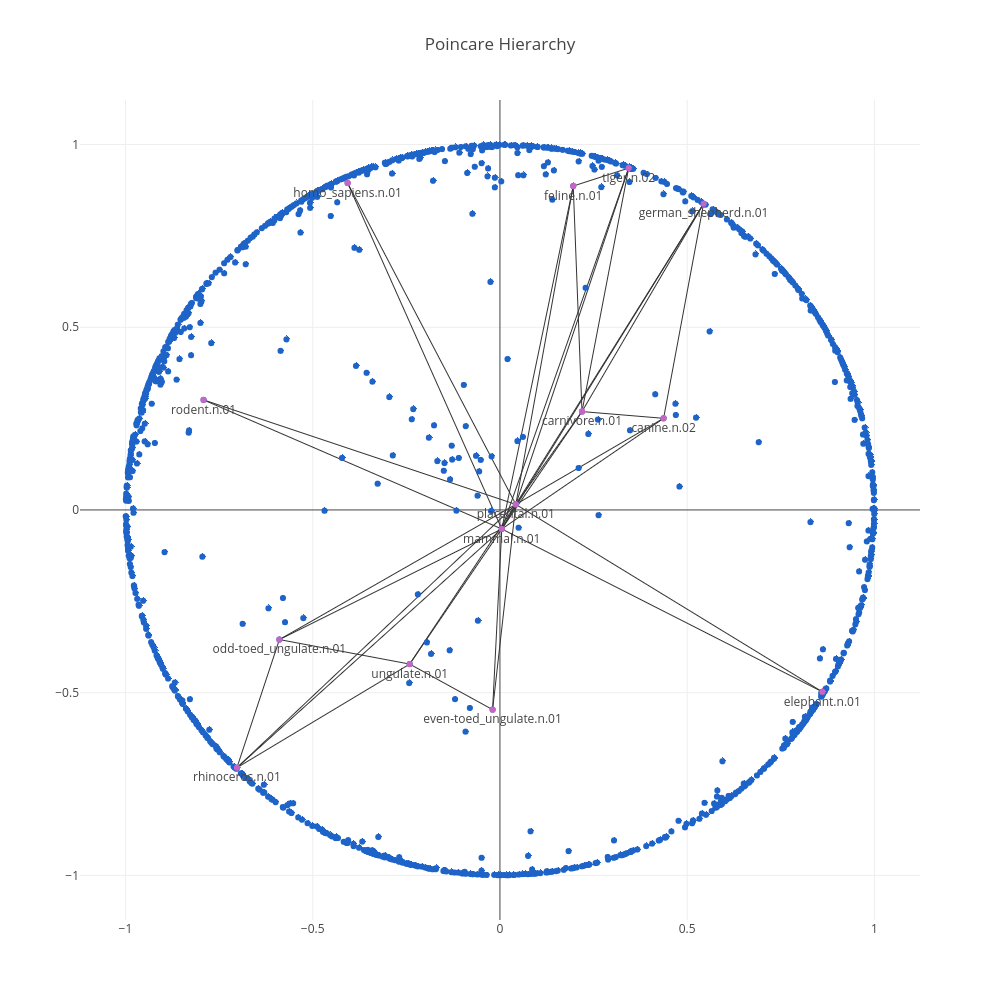

In [0]:
py.image.ishow(fig, width=1000, height=1000)

In [0]:
py.image.save_as(fig, filename='poincare_viz.png')